In [29]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import seaborn as sns

housing = pd.read_csv("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/data/Ames_Housing_Price_Data.csv", index_col=0)

housing_numeric = pd.read_pickle("housing_numeric.pkl")
housing_factor = pd.read_pickle("housing_factor.pkl")
housing_numeric['TotalSF'] = housing_numeric['TotalBsmtSF'] + housing_numeric['1stFlrSF'] + housing_numeric['2ndFlrSF']
housing_numeric['TotalBath'] = housing_numeric['BsmtFullBath'] + (housing_numeric['BsmtHalfBath']*0.5) + housing_numeric['FullBath'] + (housing_numeric['HalfBath']*0.5)
housing_factor['MixedExterior'] = housing_factor['Exterior1st'] + ' - ' + housing_factor['Exterior2nd']

housing_refined = pd.concat([housing_numeric, housing_factor], axis=1)
SalePrice = housing_refined['SalePrice']



C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\imm

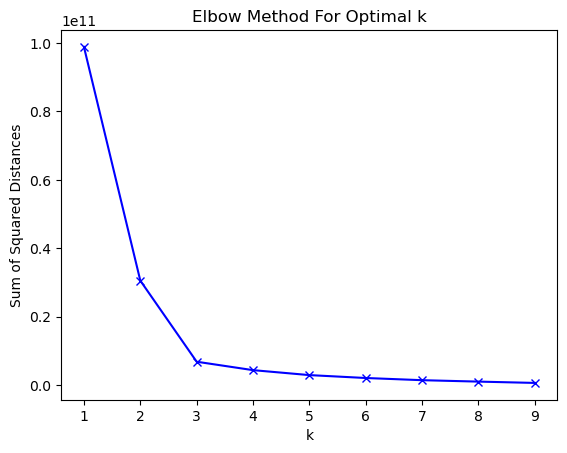

In [30]:
from sklearn.cluster import KMeans

neighborhood_prices = housing_refined[['Neighborhood', 'SalePrice']].groupby('Neighborhood').median().sort_values('SalePrice')

SS_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(neighborhood_prices)
    SS_distances.append(km.inertia_)
    

plt.plot(K, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


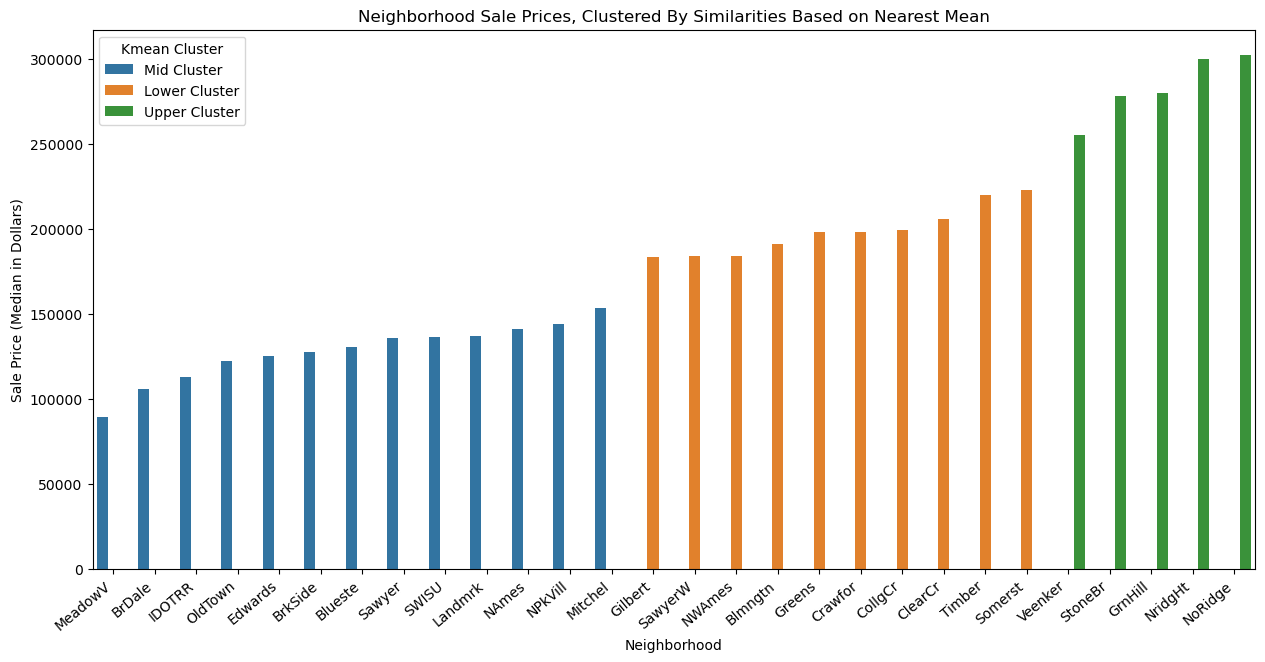

In [31]:
neighborhood_prices['Cluster'] = KMeans(n_clusters=3).fit(neighborhood_prices).labels_
neighborhood_prices['Cluster'] = neighborhood_prices['Cluster'].astype(str)
neighborhood_prices['Cluster'] = neighborhood_prices['Cluster'].str.replace('2', 'Upper Cluster')
neighborhood_prices['Cluster'] = neighborhood_prices['Cluster'].str.replace('1', 'Mid Cluster')
neighborhood_prices['Cluster'] = neighborhood_prices['Cluster'].str.replace('0', 'Lower Cluster')

plt.figure(figsize=(15,7))
ax = sns.barplot(x= neighborhood_prices.index, y=neighborhood_prices['SalePrice'], 
                 hue=neighborhood_prices['Cluster'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(ylabel='Sale Price (Median in Dollars)')
plt.title("Neighborhood Sale Prices, Clustered By Similarities Based on Nearest Mean")
plt.legend(['Lower Cluster', 'Mid Cluster', 'Upper Cluster'])
ax.legend(title = "Kmean Cluster")

In [32]:
neighborhood_prices['Cluster']

Neighborhood
MeadowV      Mid Cluster
BrDale       Mid Cluster
IDOTRR       Mid Cluster
OldTown      Mid Cluster
Edwards      Mid Cluster
BrkSide      Mid Cluster
Blueste      Mid Cluster
Sawyer       Mid Cluster
SWISU        Mid Cluster
Landmrk      Mid Cluster
NAmes        Mid Cluster
NPkVill      Mid Cluster
Mitchel      Mid Cluster
Gilbert    Lower Cluster
SawyerW    Lower Cluster
NWAmes     Lower Cluster
Blmngtn    Lower Cluster
Greens     Lower Cluster
Crawfor    Lower Cluster
CollgCr    Lower Cluster
ClearCr    Lower Cluster
Timber     Lower Cluster
Somerst    Lower Cluster
Veenker    Upper Cluster
StoneBr    Upper Cluster
GrnHill    Upper Cluster
NridgHt    Upper Cluster
NoRidge    Upper Cluster
Name: Cluster, dtype: object

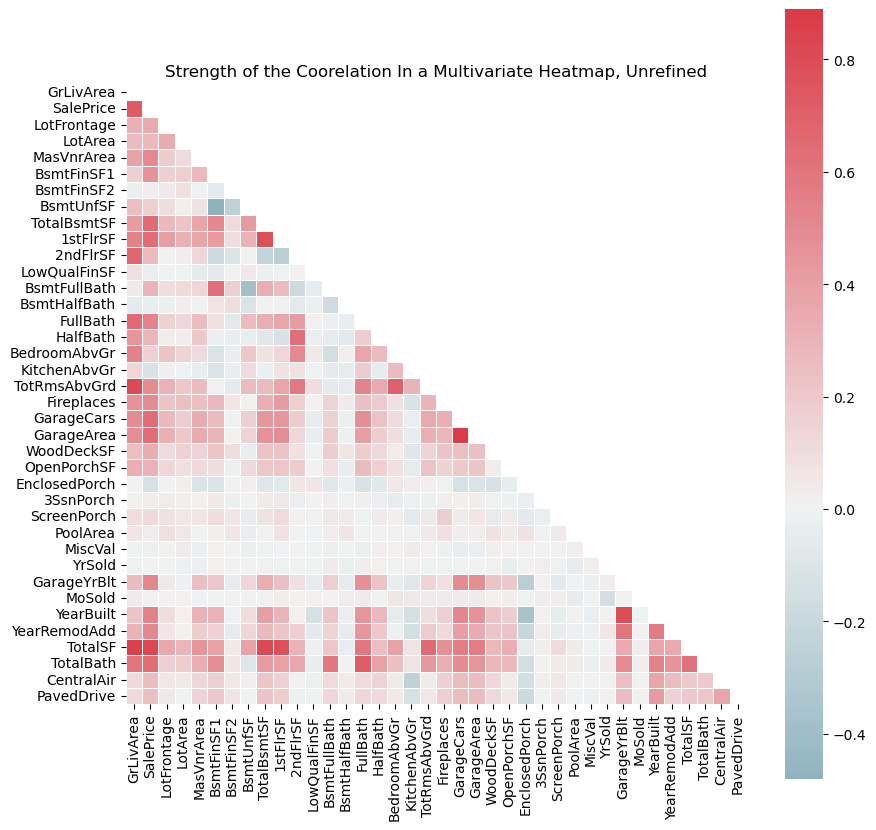

In [33]:
corr = housing_refined.corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            center=0, square=True, linewidths = .5)
plt.title("Strength of the Coorelation In a Multivariate Heatmap, Unrefined")
plt.show()

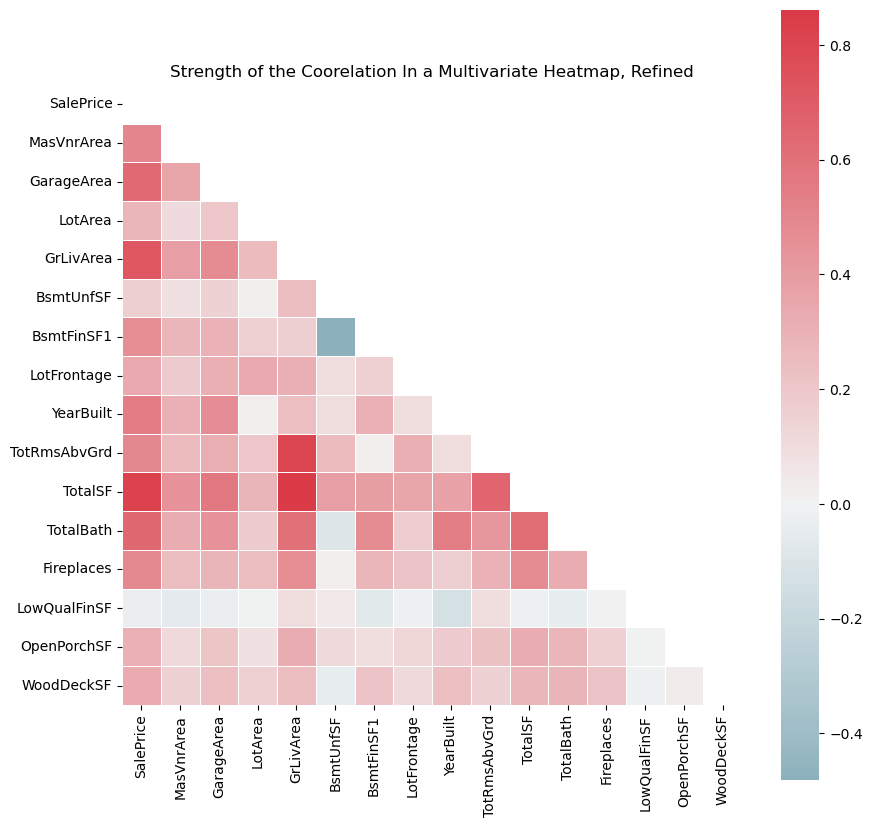

In [34]:
housing_refined = housing_refined[['SalePrice', 'MasVnrArea', 'MasVnrType', 'GarageArea', 'LotArea', 'GrLivArea', 'BsmtUnfSF', 
                           'BsmtFinSF1', 'LotFrontage', 'YearBuilt', 'Neighborhood', 'GarageType', 'OverallQual',
                           'TotRmsAbvGrd', 'BsmtFinType1', 'MSSubClass', 'OverallCond', 'GarageFinish', 'TotalSF',
                           'TotalBath', 'MixedExterior', 'Fireplaces', 'LowQualFinSF', 'OpenPorchSF', 'LotShape', 'WoodDeckSF']].copy()

corr = housing_refined.corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            center=0, square=True, linewidths = .5)
plt.title("Strength of the Coorelation In a Multivariate Heatmap, Refined")
plt.show()

In [35]:
#housing_numeric.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

housing_numeric.dtypes['TotalSF'] 

dtype('float64')

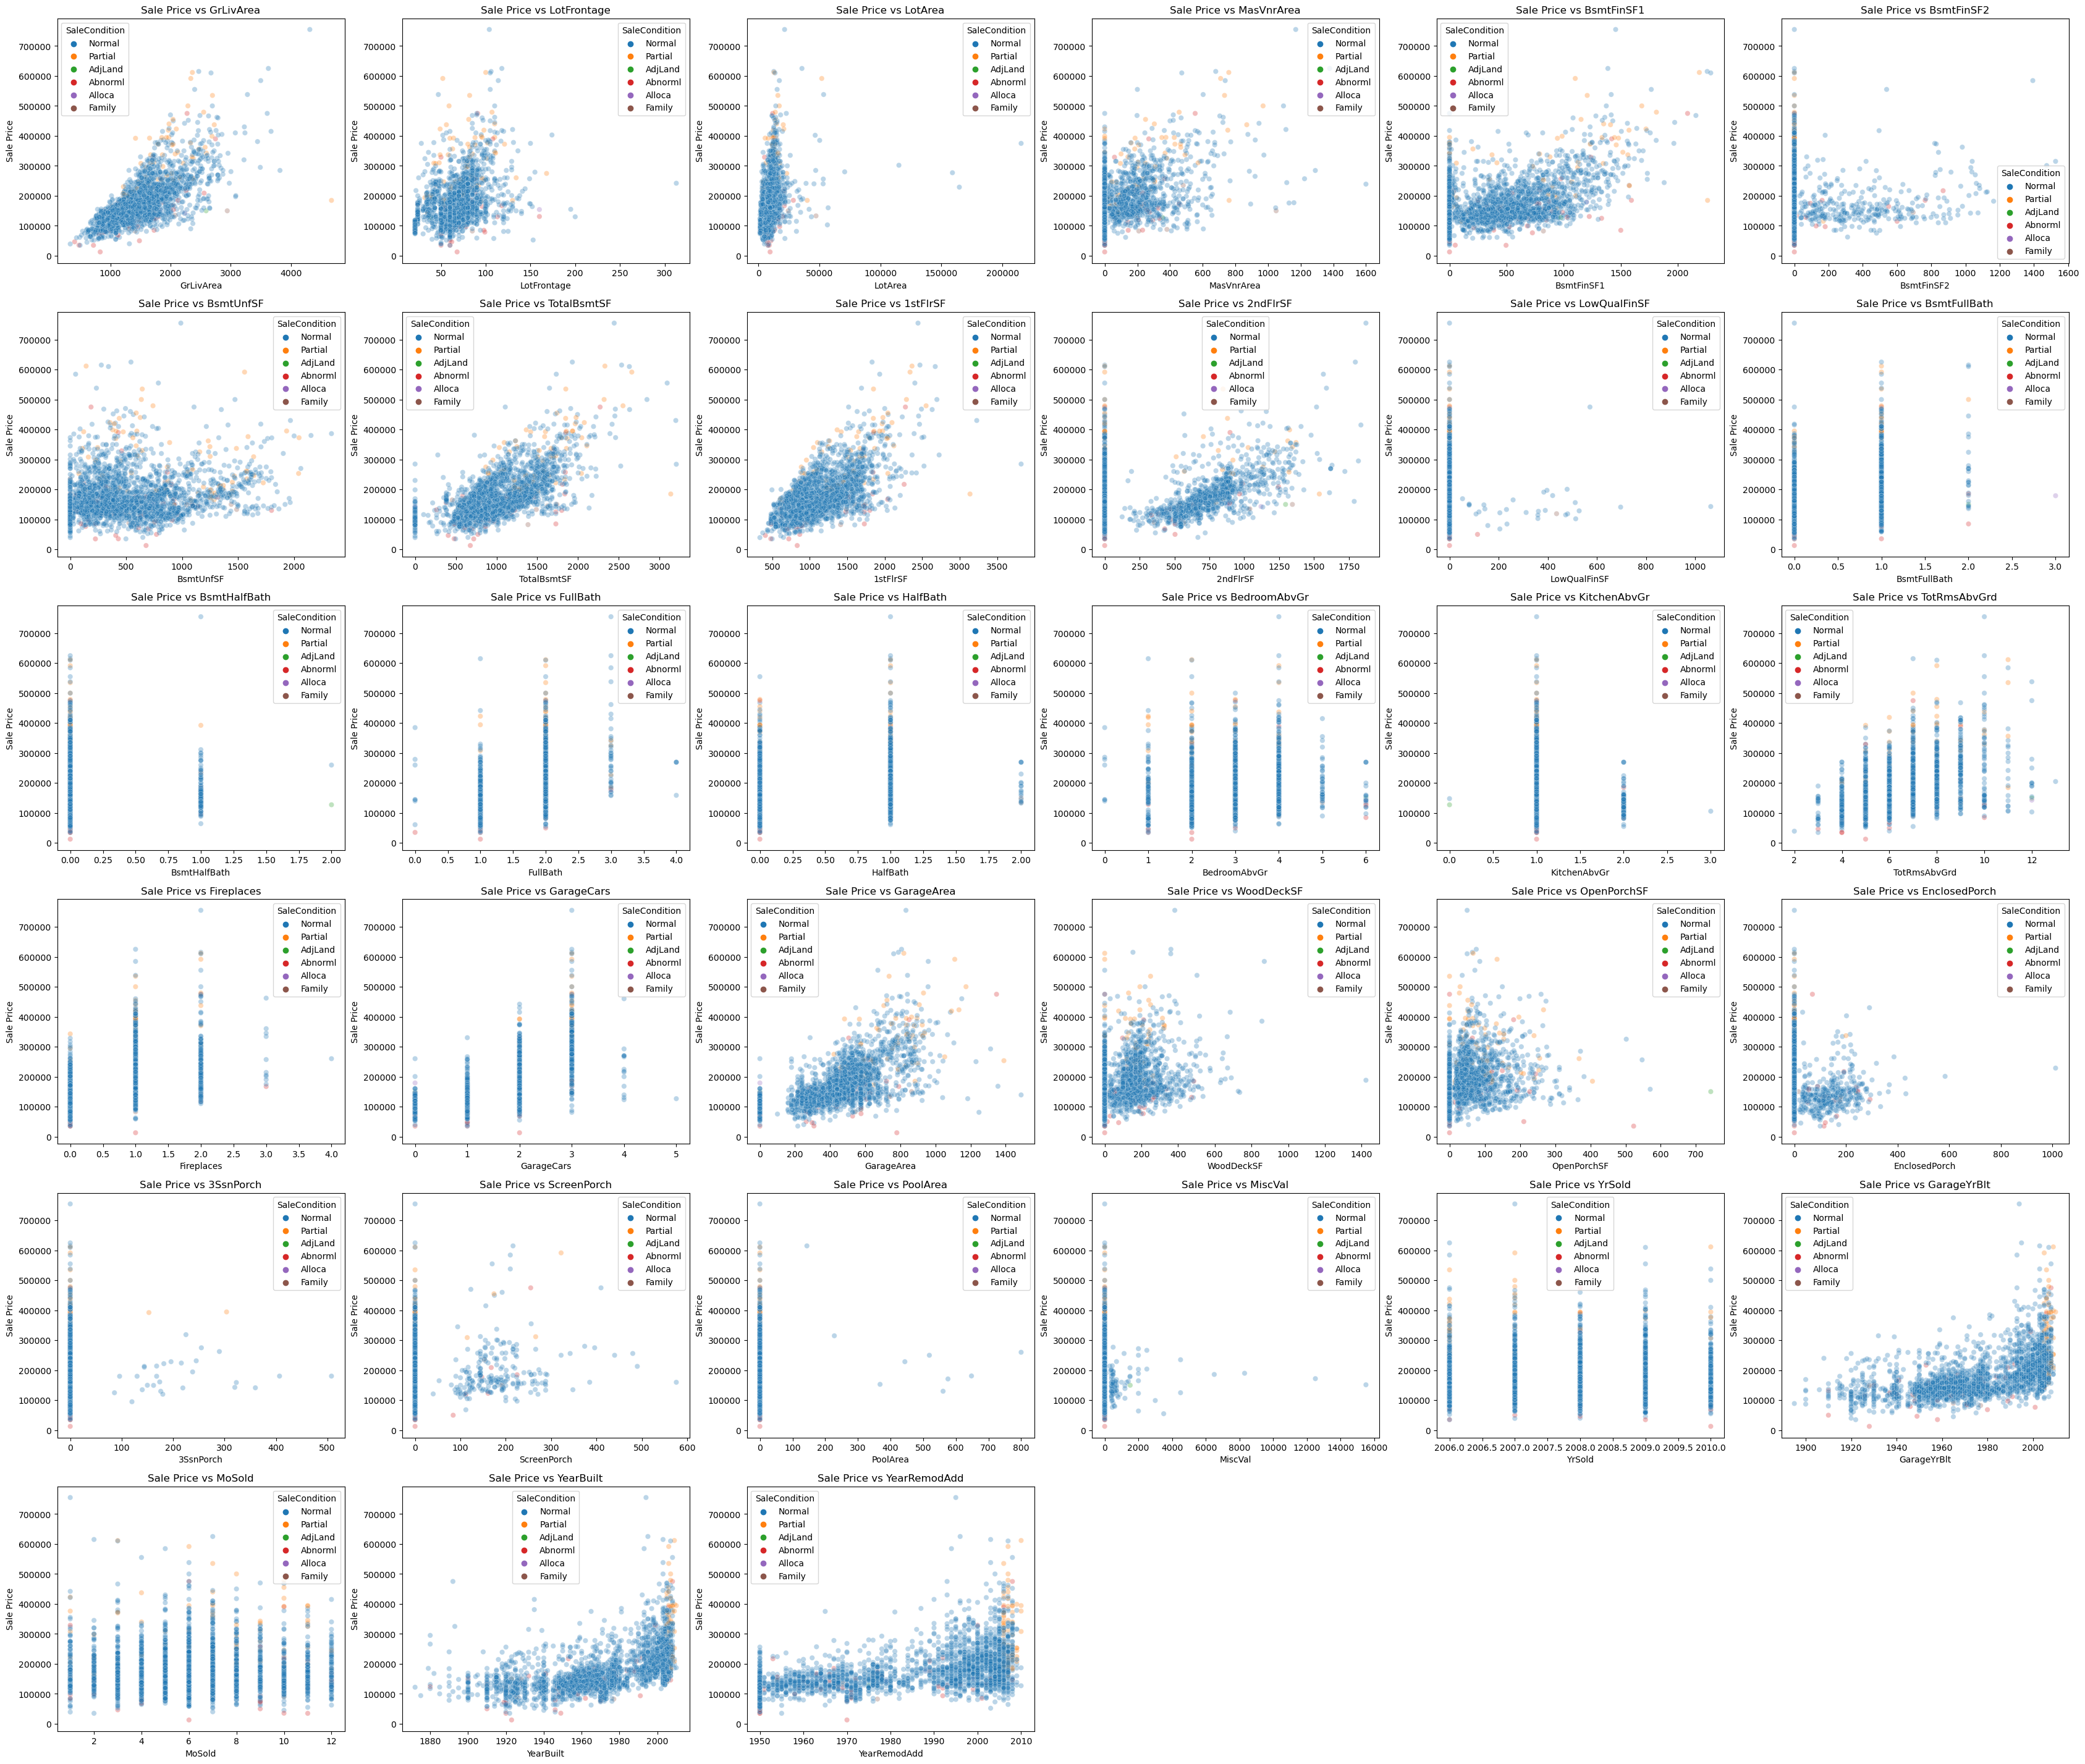

In [36]:
import math

cont_num_cols = housing_numeric.drop(['SalePrice', 'TotalSF', 'TotalBath'], axis=1)

n_cols = 6
n_rows = math.ceil(len(cont_num_cols.columns) / n_cols)
n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6))
if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Make it iterable
for i, column in enumerate(cont_num_cols.columns):
    sns.scatterplot(data=housing, x=column, y='SalePrice', ax=axes[i], alpha = 0.3, hue='SaleCondition')
    axes[i].set_title(f'Sale Price vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Sale Price')
    
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

#plt.savefig('numeric_regression.png')

Train-Test R^2 Score: 0.4855
Cross-Validation R^2 Scores: [0.4884, 0.5412, 0.5214, 0.5458, 0.4672]


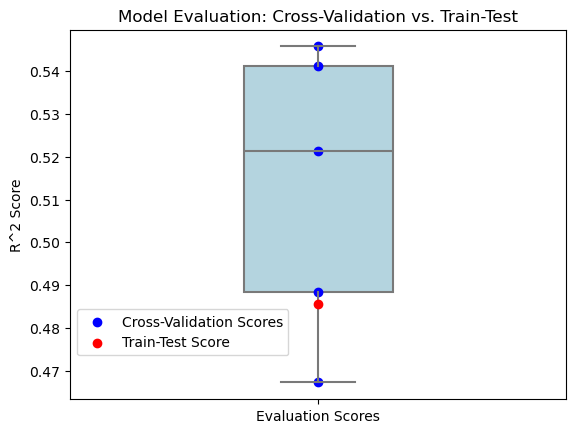

Fold 1:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.4884

Fold 2:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.5412

Fold 3:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.5214

Fold 4:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.5458

Fold 5:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.4672



In [40]:
# Load the Ames dataset
import pandas as pd
Ames = pd.read_csv('~/Documents/NYCDSA/Third Project/ML_Ames_Housing/data/Ames_Housing_Price_Data.csv')
# Import Linear Regression, Train-Test, Cross-Validation from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
X = Ames[['GrLivArea']]  # Feature: GrLivArea
y = Ames['SalePrice']    # Target: SalePrice
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear Regression model using Train-Test
model = LinearRegression()
model.fit(X_train, y_train)
train_test_score = round(model.score(X_test, y_test), 4)
print(f"Train-Test R^2 Score: {train_test_score}")
# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
cv_scores_rounded = [round(score, 4) for score in cv_scores]
print(f"Cross-Validation R^2 Scores: {cv_scores_rounded}")
# Import Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming cv_scores_rounded contains your cross-validation scores
# And train_test_score is your single train-test R^2 score
# Plot the box plot for cross-validation scores
cv_scores_df = pd.DataFrame(cv_scores_rounded, columns=['Cross-Validation Scores'])
sns.boxplot(data=cv_scores_df, y='Cross-Validation Scores', width=0.3, color='lightblue', fliersize=0)
# Overlay individual scores as points
plt.scatter([0] * len(cv_scores_rounded), cv_scores_rounded, color='blue', label='Cross-Validation Scores')
plt.scatter(0, train_test_score, color='red', zorder=5, label='Train-Test Score')
# Plot the visual
plt.title('Model Evaluation: Cross-Validation vs. Train-Test')
plt.ylabel('R^2 Score')
plt.xticks([0], ['Evaluation Scores'])
plt.legend(loc='lower left', bbox_to_anchor=(0, +0.1))
plt.show()
# Import K-Fold and necessary libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Select features and target
X = Ames[['GrLivArea']].values  # Convert to numpy array for KFold
y = Ames['SalePrice'].values    # Convert to numpy array for KFold
# Initialize Linear Regression and K-Fold
model = LinearRegression()
kf = KFold(n_splits=5)
# Manually perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Fit the model and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate and print the R^2 score for the current fold
    print(f"Fold {fold}:")
    print(f"TRAIN set size: {len(train_index)}")
    print(f"TEST set size: {len(test_index)}")
    print(f"R^2 score: {round(r2_score(y_test, y_pred), 4)}\n")

In [42]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select features and target
X = Ames[['GrLivArea']].values  # Convert to numpy array for KFold
y = Ames['SalePrice'].values    # Convert to numpy array for KFold
# Initialize Linear Regression and K-Fold
model = LinearRegression()
kf = KFold(n_splits=5)
# Manually perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Fit the model and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate and print the R^2 score for the current fold
    print(f"Fold {fold}:")
    print(f"TRAIN set size: {len(train_index)}")
    print(f"TEST set size: {len(test_index)}")
    print(f"R^2 score: {round(r2_score(y_test, y_pred), 4)}\n")

Fold 1:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.4884

Fold 2:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.5412

Fold 3:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.5214

Fold 4:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.5458

Fold 5:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.4672

